# Carga y Analisis de Memoria

In [18]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("./Documents/python-ml-course-master/datasets/train.csv", index_col='id', parse_dates=['fecha'])
df.head()



,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,2.0,...,23533.0,NaN,NaN,2015-08-23,0.0,0.0,0.0,0.0,0.0,2273000.0
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28,0.0,0.0,0.0,1.0,1.0,3600000.0
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,2.0,...,48551.0,NaN,NaN,2015-10-17,0.0,0.0,0.0,0.0,0.0,1200000.0
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09,0.0,0.0,0.0,1.0,1.0,650000.0
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,1.0,...,47835.0,NaN,NaN,2016-06-07,0.0,0.0,0.0,0.0,0.0,1150000.0


In [7]:
df.memory_usage(deep=True)

Index                           1920000
titulo                         24604524
descripcion                   117551747
tipodepropiedad                15464278
direccion                      16862075
ciudad                         19092169
provincia                      18678722
antiguedad                      1920000
habitaciones                    1920000
garages                         1920000
banos                           1920000
metroscubiertos                 1920000
metrostotales                   1920000
idzona                          1920000
lat                             1920000
lng                             1920000
fecha                           1920000
gimnasio                        1920000
usosmultiples                   1920000
piscina                         1920000
escuelascercanas                1920000
centroscomercialescercanos      1920000
precio                          1920000
dtype: int64

In [8]:
df.memory_usage(deep=True).sum()

244893515

In [10]:
df['descripcion'] = df.descripcion.astype('category')

In [11]:
df['titulo'] = df.titulo.astype('category')

In [12]:
df['tipodepropiedad'] = df.tipodepropiedad.astype('category')

In [13]:
df['ciudad'] = df.ciudad.astype('category')

In [14]:
df['provincia'] = df.provincia.astype('category')

In [15]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240000 entries, 254099 to 121958
Data columns (total 22 columns):
titulo                        234613 non-null category
descripcion                   238381 non-null category
tipodepropiedad               239954 non-null category
direccion                     186928 non-null object
ciudad                        239628 non-null category
provincia                     239845 non-null category
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240000 non-null datetime64[ns]
gimnasio 

In [16]:
df.memory_usage(deep=True)

Index                           1920000
titulo                         25994583
descripcion                   125985666
tipodepropiedad                  242312
direccion                      16862075
ciudad                           587446
provincia                        243552
antiguedad                      1920000
habitaciones                    1920000
garages                         1920000
banos                           1920000
metroscubiertos                 1920000
metrostotales                   1920000
idzona                          1920000
lat                             1920000
lng                             1920000
fecha                           1920000
gimnasio                        1920000
usosmultiples                   1920000
piscina                         1920000
escuelascercanas                1920000
centroscomercialescercanos      1920000
precio                          1920000
dtype: int64

* Pasamos de 233 MB a una reduccion de 193 MB

# PROMEDIO DE CADA PROVINCIA

In [68]:
grouped = df.groupby("provincia")
grouped = grouped.mean()
grouped = grouped.sort_values(by=['antiguedad'],ascending=False)
grouped.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
provincia,,,,,,,,,,,,,,,
Distrito Federal,12.19,2.74,1.42,1.99,156.45,161.50,6125039.56,19.36,-98.83,0.08,0.07,0.04,0.48,0.45,3471705.09
Edo. de México,10.03,2.97,1.66,2.08,179.79,173.40,97700.41,19.46,-98.73,0.07,0.07,0.06,0.54,0.51,2762464.91
Guerrero,7.61,2.82,1.33,2.29,157.24,169.19,50687.65,16.64,-98.22,0.17,0.14,0.56,0.41,0.56,2548741.86
Nuevo León,7.54,2.94,1.53,2.31,198.62,180.02,666147.00,24.93,-97.49,0.06,0.03,0.05,0.32,0.24,2717757.65
Aguascalientes,7.52,3.10,1.54,2.12,176.18,173.28,43294.98,21.83,-102.20,0.05,0.06,0.10,0.56,0.49,1477188.77


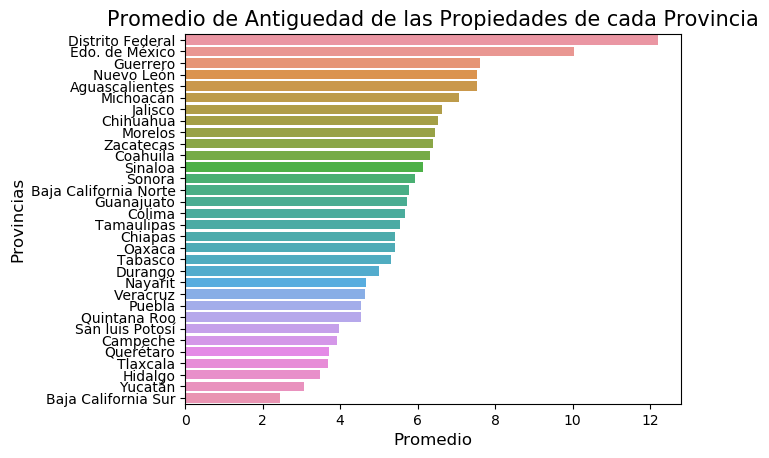

In [70]:
main_provincias_counts = grouped["antiguedad"]
main_provincias_counts.sort_values(ascending=False)
g = sns.barplot(x=main_provincias_counts.values, y=main_provincias_counts.index, orient='h')
g.set_title("Promedio de Antiguedad de las Propiedades de cada Provincia", fontsize=15)
g.set_xlabel("Promedio", fontsize=12)
g.set_ylabel("Provincias", fontsize=12)
sns.set(style="whitegrid")
plt.style.use('default')

# Promedio de metros totales de cada Provincia


Text(0, 0.5, 'Provincias')

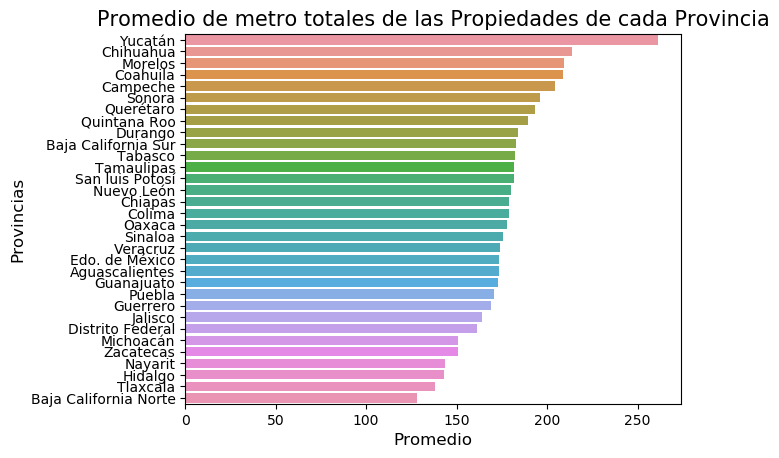

In [71]:
grouped = grouped.sort_values(by=['metrostotales'],ascending=False)
g = sns.barplot(x=grouped['metrostotales'].values, y=grouped['metrostotales'].index, orient='h')
g.set_title("Promedio de metro totales de las Propiedades de cada Provincia", fontsize=15)
g.set_xlabel("Promedio", fontsize=12)
g.set_ylabel("Provincias", fontsize=12)

# Promedio del Valor de las propiedades de cada Provincia

Text(0, 0.5, 'Provincias')

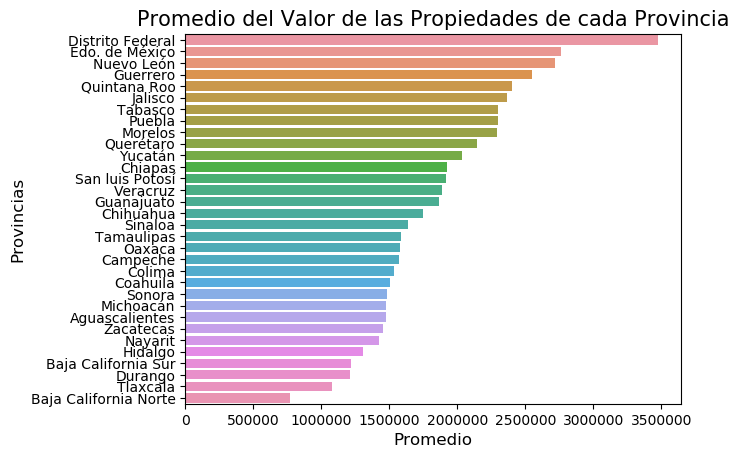

In [72]:
grouped = grouped.sort_values(by=['precio'],ascending=False)
g = sns.barplot(x=grouped['precio'].values, y=grouped['precio'].index, orient='h')
g.set_title("Promedio del Valor de las Propiedades de cada Provincia", fontsize=15)
g.set_xlabel("Promedio", fontsize=12)
g.set_ylabel("Provincias", fontsize=12)